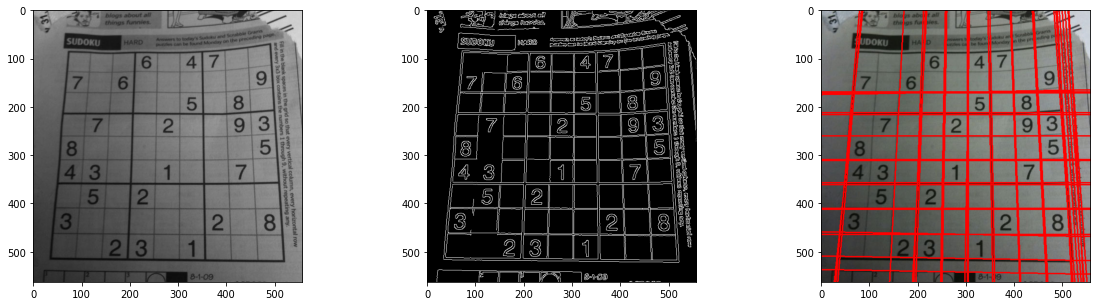

In [11]:
#Question 1
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 

img = cv.imread('sudoku.png',cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edged,1,np.pi/180,175)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0+1000*(-b)),int(y0+1000*(a))
    x2,y2 = int(x0-1000*(-b)),int(y0-1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

fig,ax = plt.subplots(1,3,figsize = (20,5))
gray = cv.cvtColor(gray, cv.COLOR_BGR2RGB)
edged = cv.cvtColor(edged, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax[0].imshow(gray)
ax[1].imshow(edged)
ax[2].imshow(img)

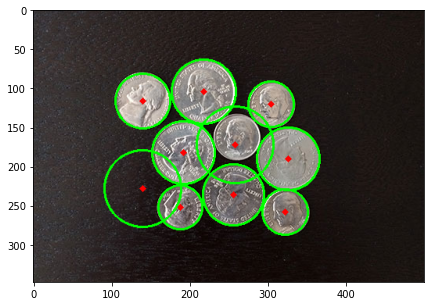

In [8]:
#Question 2
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 

img = cv.imread('coins.jpg',cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)
fig,ax = plt.subplots(1,1,figsize = (20,5))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ax.imshow(img)

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


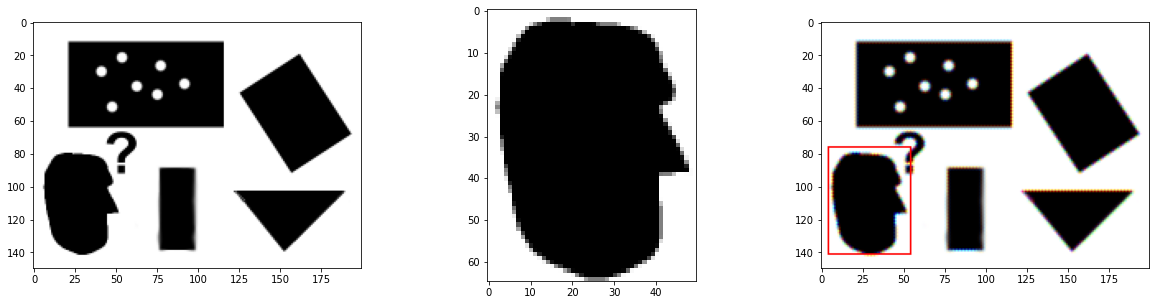

In [15]:
#Question 3

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

im=cv.imread('pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
templ=cv.imread('templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x,y,scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x,y,scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0,0,255))

fig,ax = plt.subplots(1,3,figsize = (20,5))
out = cv.cvtColor(out, cv.COLOR_BGR2RGB)
templ = cv.cvtColor(templ, cv.COLOR_BGR2RGB)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
ax[0].imshow(im)
ax[1].imshow(templ)
ax[2].imshow(out)

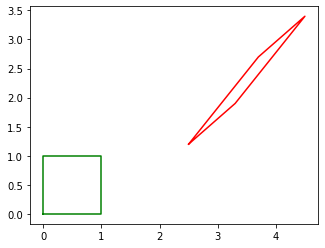

In [17]:
#Question 4
a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 2.5, 1.2
# H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0,0,1]])
# Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 #Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

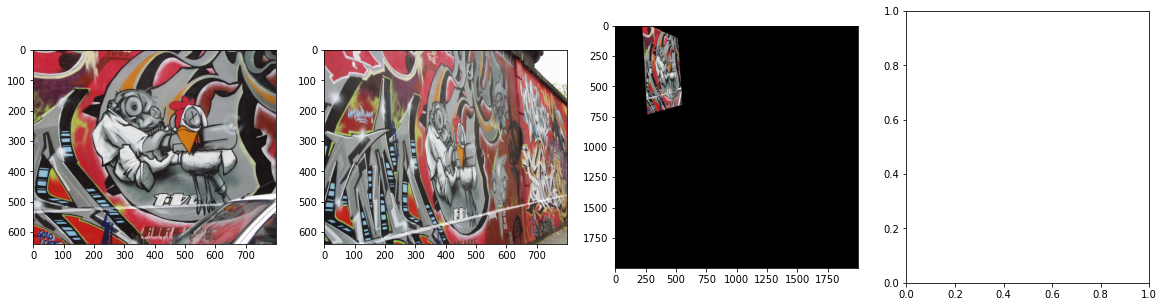

In [18]:
#Question 5
# warping using the given homography
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im1 = cv.imread(r'img1.ppm',cv.IMREAD_ANYCOLOR)
im5 = cv.imread(r'img5.ppm',cv.IMREAD_ANYCOLOR)
#H = np.array([[6.6378505e-01  , 6.8003334e-01 , -3.1230335e+01],[-1.4495500e-01 ,  9.7128304e-01 ,  1.4877420e+02],[ 4.2518504e-04  ,-1.3930359e-05  , 1.0000000e+00]])
H = np.array([[6.2544644e-01, 5.7759174e-02, 2.2201217e+02],
   [2.2240536e-01, 1.1652147e+00,-2.5605611e+01],
   [4.9212545e-04,-3.6542424e-05,1.0000000e+00]])
im1to5 = cv.warpPerspective(im1,H,(2000,2000))

# im1to4 = cv.warpPerspective(im1,np.linalg.inv(H),(2000,2000))  

fig,ax = plt.subplots(1,4,figsize = (20,5))
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
ax[0].imshow(im1)
im4 = cv.cvtColor(im5, cv.COLOR_BGR2RGB)
ax[1].imshow(im4)
im1to4 = cv.cvtColor(im1to5, cv.COLOR_BGR2RGB)
ax[2].imshow(im1to4)  
